# Historical House Sale Data Analysis

The [house sale register](http://mlg.ucd.ie/modules/python/housing/) webpage contains details of house sale prices from 01 Jan 2020 to 31 Dec 2023. The objective of the project is to collect data from the above webpage, process and prepare the data, analyse the data with visualisations and finally develop models for housing price prediction and classification.


## Data Collection

---

This phase of the project involves scraping all the house price data from the webpage.


In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup as bs

In [2]:
url = "http://mlg.ucd.ie/modules/python/housing/"

# get the html page content via http get requests
page = requests.get(url)

# create a BeautifulSOup Object from the html content from the http response
soup = bs(page.content, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="noindex" name="robots"/>
  <meta content="Content on this site is posted for teaching purposes only. This dataset is for '$STUDENT_ID$'." name="description"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   House Sale Register
  </title>
  <link href="http://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" target="_blank"/>
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.3/jquery.min.js">
  </script>
  <script src="http://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/js/bootstrap.min.js">
  </script>
  <style>
   .jumbotron
    {

    }
    .jumbotron .h1, .jumbotron h1 
    {
      font-size: 45px;
      margin-top: 0;
      margin-bottom: 0;
    }
    h2
    {
      margin: 1em 0 1em 0;  
    }
    li
    {
      font-size: 100%;
    }
    div.instructions
    {
     

In [ ]:
# extract the table header data
table_col_names = soup.find("thead").find("tr").findAll("th")

colnames = []

# loops through each header cell and extracts the text
for col in table_col_names:
    # converts the text to lower case
    # trims whitespace at both ends
    # replaces the whitespaces in between with '_' character
    column_name = ((col.text).lower()).strip().replace(" ", "_")
    colnames.append(column_name)


colnames

['date_of_sale', 'location', 'price', 'year_built', 'size', 'description']

In [ ]:
# list to store the house sale data
data = []

# extracts the data rows
table_rows = soup.find("tbody").findAll("tr")

# parse each row and store it in the data list, creates a 2D-list/table
for row in table_rows:

    row_data = []

    # extracts all table cells in the current rows
    cells = row.findAll("td")

    # loops through each cell in the row and extract the data
    for cell in cells:
        row_data.append((cell.text).strip())

    data.append(row_data)

data

[['06 Jan, 2020',
  'West End',
  '€732,986.00',
  '2010',
  '1,696 sq ft',
  'Type: Detached; Style: 2-Storey; 3 Bedrooms; 2 Bathrooms'],
 ['06 Jan 2020',
  'West End',
  '€985,889.00',
  '2004',
  '2,355 sq ft',
  'Type: Detached; Style: 2-Storey; 4 Bedrooms; 2 Bathrooms'],
 ['07 Jan 20',
  'Brookville',
  '€1,047,124.00',
  '2013',
  '1,836 sq ft',
  'Type: Detached; Style: 2-Storey; 3 Bedrooms; 2 Bathrooms'],
 ['07 Jan, 2020',
  'Brookville',
  '€516,439.00',
  '2000',
  '1,000 sq ft',
  'Type: Detached; Style: 1-Storey; 3 Bedrooms; 1 Bathroom'],
 ['16 Jan 2020',
  'Brookville',
  '€890,423.00',
  '2011',
  '1,536 sq ft',
  'Type: Detached; Style: 1-Storey; 3 Bedrooms; 2 Bathrooms'],
 ['24 Jan 2020',
  'Clarawood',
  '€564,812.00',
  '1971',
  '1,033 sq ft',
  'Type: Detached; Style: 1-Storey; 3 Bedrooms; 1 Bathroom'],
 ['24 Jan 2020',
  'West End',
  '€604,039.00',
  '1965',
  '1,086 sq ft',
  'Type: Terraced; Style: 1-Storey; 3 Bedrooms; 1 Bathroom'],
 ['24 Jan 2020',
  'West End

In [ ]:
# converts the data to a data frame

df_raw = pd.DataFrame(data, columns=colnames)

df_raw

0       €732,986.00
1       €985,889.00
2     €1,047,124.00
3       €516,439.00
4       €890,423.00
5       €564,812.00
6       €604,039.00
7       €971,535.00
8     €1,161,463.00
9       €829,294.00
10      €922,807.00
11    €1,464,855.00
12      €736,129.00
13    €1,012,190.00
14      €934,144.00
15    €1,012,072.00
16      €674,074.00
17      €895,383.00
18    €1,275,956.00
19    €1,239,411.00
20      €194,342.00
21      €436,165.00
22      €622,730.00
23      €539,438.00
24      €599,987.00
25      €674,549.00
26      €667,990.00
27      €788,217.00
28      €683,056.00
29      €818,063.00
30      €595,181.00
31      €581,208.00
32      €724,821.00
33      €598,927.00
34      €420,149.00
35      €485,132.00
36      €729,878.00
37    €1,238,127.00
38      €856,662.00
39      €641,545.00
40      €798,523.00
41      €449,341.00
42    €1,496,532.00
43    €1,523,841.00
44    €1,051,527.00
45      €771,866.00
46      €534,927.00
47      €750,086.00
48      €499,806.00
49      €466,188.00


## Data Cleaning and Preprocessing

---

This phase of the project involves addressing any data quality issues, if present.


In [6]:
df = df_raw

In [7]:
df.head()

,date_of_sale,location,price,year_built,size,description
0,"06 Jan, 2020",West End,"€732,986.00",2010,"1,696 sq ft",Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...
1,06 Jan 2020,West End,"€985,889.00",2004,"2,355 sq ft",Type: Detached; Style: 2-Storey; 4 Bedrooms; 2...
2,07 Jan 20,Brookville,"€1,047,124.00",2013,"1,836 sq ft",Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...
3,"07 Jan, 2020",Brookville,"€516,439.00",2000,"1,000 sq ft",Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...
4,16 Jan 2020,Brookville,"€890,423.00",2011,"1,536 sq ft",Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...


By inspecting the data sample, we can see that columns like `date_of_sale`, `price`, `size` and `description` needs processing.


In [ ]:
# Date formatting
df["date_of_sale"] = df["date_of_sale"].str.replace(",", "")
df[["day_of_sale", "month_of_sale", "year_of_sale"]] = df["date_of_sale"].str.split(
    expand=True
)

In [ ]:
# format price column
# €971,535.00  -> 971535
df["price"] = df["price"].str.replace(",", "")
df["price"] = df["price"].str.replace("€", "")

In [ ]:
# fixing the size column
df["size"] = df["size"].str.replace(r"[a-zA-Z,\s]", "", regex=True)

In [ ]:
# split description column

df["type"] = df["description"].str.extract("(Type: [a-zA-Z-]*)")
df["type"] = df["type"].str.replace("Type: ", "")
df["type"].unique()

array(['Detached', 'Terraced', 'Semi-Detached', 'Bunaglow', 'Duplex',
       'Semi-D', 'End-of-Terrace', nan, 'EndOfTerrace'], dtype=object)

In [ ]:
df["style"] = df["description"].str.extract("(Style: [a-zA-Z\d-]*)")
df["style"] = df["style"].str.replace(r"(Style:)|(-Storey)", "", regex=True)
df["style"].unique()

array([' 2', ' 1', ' Two', ' One', nan, ' Dormer'], dtype=object)

In [ ]:
df["style"] = df["style"].str.replace("One", "1")
df["style"] = df["style"].str.replace("Two", "2")
df["style"] = df["style"].str.replace("Dormer", "0")

df["style"].unique()


# 1- dormer style building
# 1- one-storey building
# 2- Two-storey building

array([' 2', ' 1', nan, ' 0'], dtype=object)

In [ ]:
df["bedrooms"] = df["description"].str.extract("(\d Bedrooms?)")
df["bedrooms"] = df["bedrooms"].str.replace(r"\s* Bedrooms?", "", regex=True)
df["bedrooms"].unique()

array(['3', '4', '2', '1', '5'], dtype=object)

In [ ]:
df["bathrooms"] = df["description"].str.extract("(\d Bathrooms?)")
df["bathrooms"] = df["bathrooms"].str.replace(r"Bathrooms?", "", regex=True)
df["bathrooms"].unique()

array(['2 ', '1 ', '3 '], dtype=object)

In [ ]:
# numeric columns
numeric_cols = [
    "day_of_sale",
    "year_of_sale",
    "price",
    "year_built",
    "size",
    "style",
    "bedrooms",
    "bathrooms",
]

# converting to numeric values
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

df[numeric_cols] = df[numeric_cols].astype("Int64")

# as all data is collected between the date range of 01 Jan 2020 to 31 Dec 2023
df.loc[df["year_of_sale"] < 25, "year_of_sale"] = df["year_of_sale"] + 2000

In [17]:
df.duplicated().sum()

0

In [18]:
# checking for missing values
df.isna().sum()

date_of_sale      0
location          0
price             0
year_built       20
size              0
description       0
day_of_sale       0
month_of_sale     0
year_of_sale      0
type             18
style            10
bedrooms          0
bathrooms         0
dtype: int64

In [ ]:
# checking the dimension of the df before removing na values
print(f"size of the dataframe before drop operation {df.shape}")

total_rows = df.shape[0]

# drop rows if there are any na values in the row
df = df.dropna()

# checking the dimension of the df after removing na values
print(f"size of the dataframe after drop operation {df.shape}")

print(f"removed {total_rows - df.shape[0]} rows")

size of the dataframe before drop operation (1009, 13)
size of the dataframe after drop operation (961, 13)
removed 48 rows


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 1008
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_of_sale   961 non-null    object
 1   location       961 non-null    object
 2   price          961 non-null    Int64 
 3   year_built     961 non-null    Int64 
 4   size           961 non-null    Int64 
 5   description    961 non-null    object
 6   day_of_sale    961 non-null    Int64 
 7   month_of_sale  961 non-null    object
 8   year_of_sale   961 non-null    Int64 
 9   type           961 non-null    object
 10  style          961 non-null    Int64 
 11  bedrooms       961 non-null    Int64 
 12  bathrooms      961 non-null    Int64 
dtypes: Int64(8), object(5)
memory usage: 112.6+ KB


In [ ]:
# from the info we can see few columns has come out as floats

# Remove unwanted columns
df_cleaned = df.drop(["date_of_sale", "description"], axis=1)

# Reorder the columns
column_order = [
    "day_of_sale",
    "month_of_sale",
    "year_of_sale",
    "location",
    "price",
    "year_built",
    "size",
    "type",
    "style",
    "bedrooms",
    "bathrooms",
]
df_cleaned = df_cleaned[column_order]

df_cleaned.head()

,day_of_sale,month_of_sale,year_of_sale,location,price,year_built,size,type,style,bedrooms,bathrooms
0,6,Jan,2020,West End,732986,2010,1696,Detached,2,3,2
1,6,Jan,2020,West End,985889,2004,2355,Detached,2,4,2
2,7,Jan,2020,Brookville,1047124,2013,1836,Detached,2,3,2
3,7,Jan,2020,Brookville,516439,2000,1000,Detached,1,3,1
4,16,Jan,2020,Brookville,890423,2011,1536,Detached,1,3,2


In [22]:
df

df_cleaned.describe()

,day_of_sale,year_of_sale,price,year_built,size,style,bedrooms,bathrooms
count,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0
mean,15.681582,2021.628512,760264.022893,1983.400624,1486.244537,1.295525,2.89282,1.616025
std,8.958037,1.132097,324895.293378,31.799646,446.882555,0.582801,0.717316,0.556508
min,1.0,2020.0,194342.0,1882.0,616.0,0.0,1.0,1.0
25%,8.0,2021.0,543744.0,1964.0,1126.0,1.0,2.0,1.0
50%,15.0,2022.0,688462.0,1985.0,1473.0,1.0,3.0,2.0
75%,24.0,2023.0,914465.0,2012.0,1746.0,2.0,3.0,2.0
max,31.0,2023.0,2731800.0,2019.0,3610.0,2.0,5.0,3.0


In [ ]:
# Save DataFrame to CSV file
df_cleaned.to_csv("hist_housing_sale_data_cleaned.csv", index=False)

## Exploratory Data Analysis

---

We will explore the relationships between various variables using correlation maps, scatterplots, pairplot's e.t.c

Before starting of with the EDA process, it is crucial to identify the categorical and numerical variables in the dataset.


##### Categorical variables

- month_of_sale
- location
- type ['Detached', 'Terraced', 'Semi-Detached', 'Bunaglow', 'Duplex', 'Semi-D', 'End-of-Terrace', 'EndOfTerrace']
- style [Doemer, One-storey, Two-Storey]


In [ ]:
categorical_variables = ["month_of_sale", "location", "type", "style"]

##### Numerical Variables

- day_of_sale
- year_of_sale
- price - in thousands of euros
- year_built
- size
- bedrooms - no. of bedrooms
- bathrooms - no. of bathrooms


In [ ]:
# numerical variables
numerical_variables = [
    "day_of_sale",
    "year_of_sale",
    "price",
    "year_built",
    "size",
    "bedrooms",
    "bathrooms",
]

In [ ]:
# preparing dataframe for eda

df_eda = df_cleaned.copy(deep=True)

df_eda["price"] = df_eda["price"] / 1000

In [ ]:
df_eda["style"] = df["style"].map({0: "Dormer", 1: "One-Storey", 2: "Two-Storey"})

In [28]:
df_eda.describe()

,day_of_sale,year_of_sale,price,year_built,size,bedrooms,bathrooms
count,961.0,961.0,961.0,961.0,961.0,961.0,961.0
mean,15.681582,2021.628512,760.264023,1983.400624,1486.244537,2.89282,1.616025
std,8.958037,1.132097,324.895293,31.799646,446.882555,0.717316,0.556508
min,1.0,2020.0,194.342,1882.0,616.0,1.0,1.0
25%,8.0,2021.0,543.744,1964.0,1126.0,2.0,1.0
50%,15.0,2022.0,688.462,1985.0,1473.0,3.0,2.0
75%,24.0,2023.0,914.465,2012.0,1746.0,3.0,2.0
max,31.0,2023.0,2731.8,2019.0,3610.0,5.0,3.0


In [29]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day_of_sale    961 non-null    Int64  
 1   month_of_sale  961 non-null    object 
 2   year_of_sale   961 non-null    Int64  
 3   location       961 non-null    object 
 4   price          961 non-null    Float64
 5   year_built     961 non-null    Int64  
 6   size           961 non-null    Int64  
 7   type           961 non-null    object 
 8   style          961 non-null    object 
 9   bedrooms       961 non-null    Int64  
 10  bathrooms      961 non-null    Int64  
dtypes: Float64(1), Int64(6), object(4)
memory usage: 96.7+ KB


#### **Target Variable Distribution**


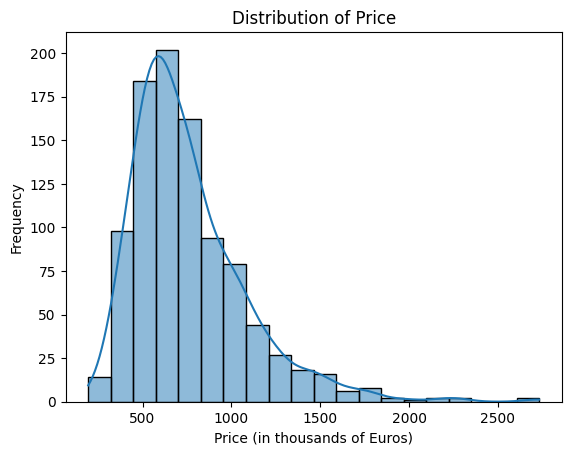

In [ ]:
sns.histplot(df_eda["price"], bins=20, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price (in thousands of Euros)")
plt.ylabel("Frequency")
plt.show()

##### Analysis of Numerical Features


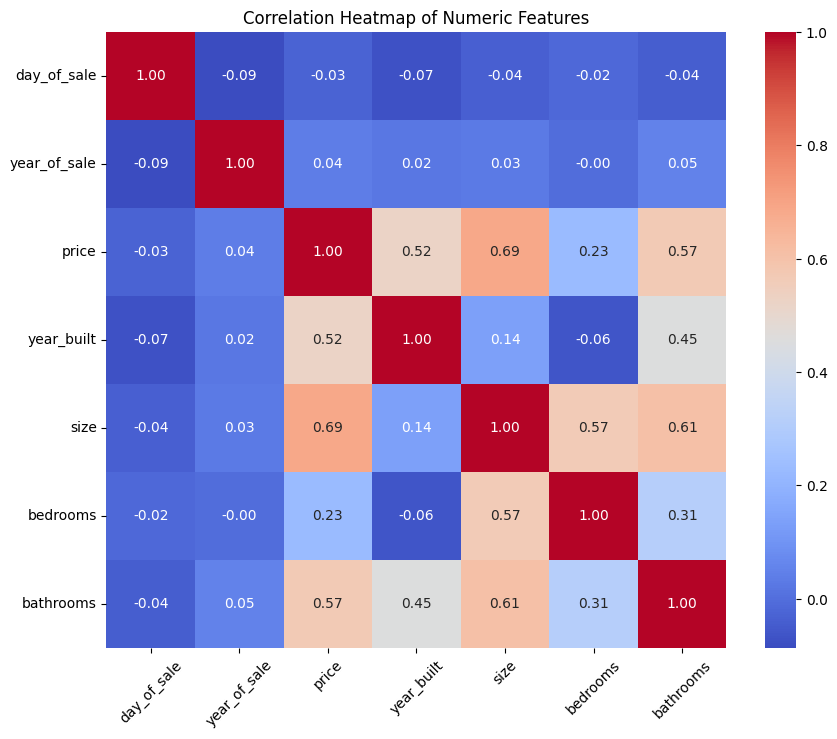

In [ ]:
correlations = df_eda[numerical_variables].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

The correlation heatmap shows how each numeric feature relates to the others, with a particular focus on the price variable. Here's a summary of the key correlations with price:

**`size`:** has a strong positive correlation with price (0.69), suggesting that as the size of the house increases, so does the sale price.

**`bathrooms`:** also shows a notable positive correlation (0.57) with price.

**`year_built`:** has a moderate positive correlation with price (0.52), indicating newer houses tend to sell for more.

**`bedrooms`:** show weaker positive correlations with price.


##### Analysis of Categorical Features


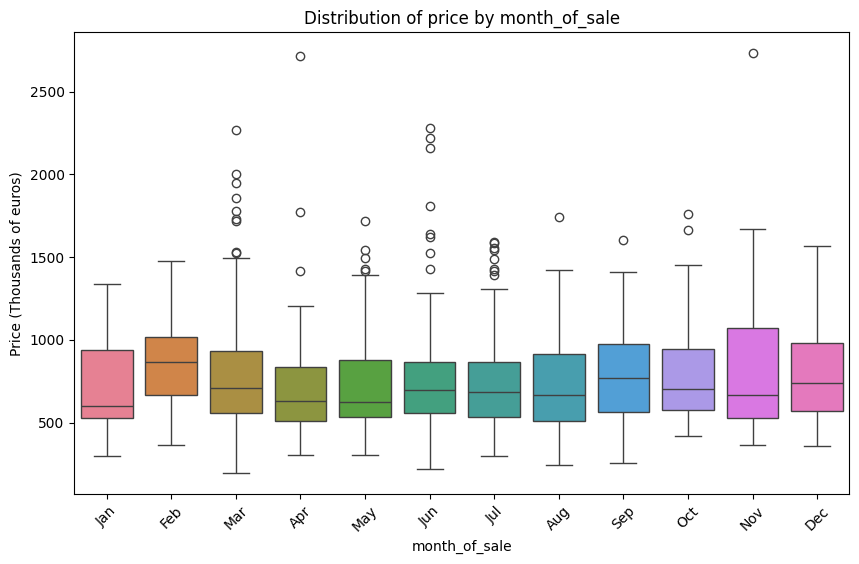

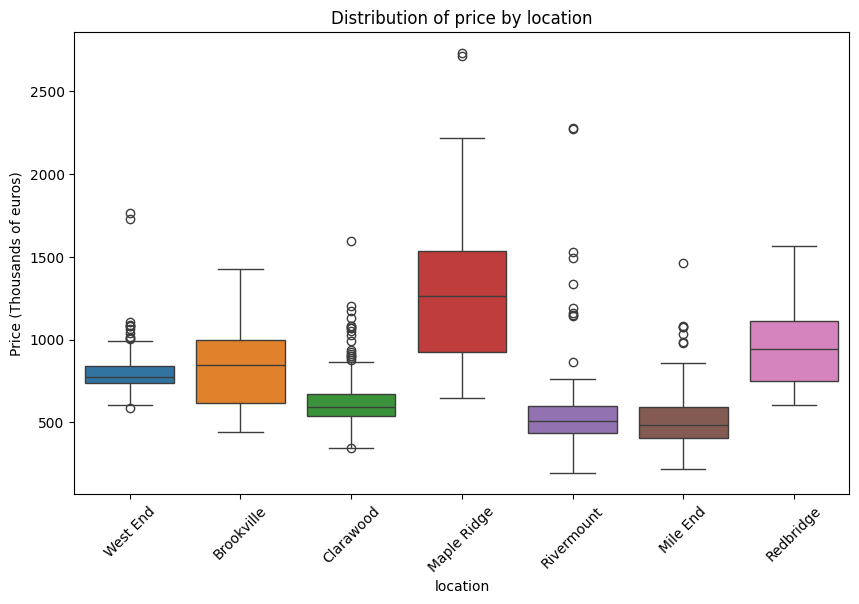

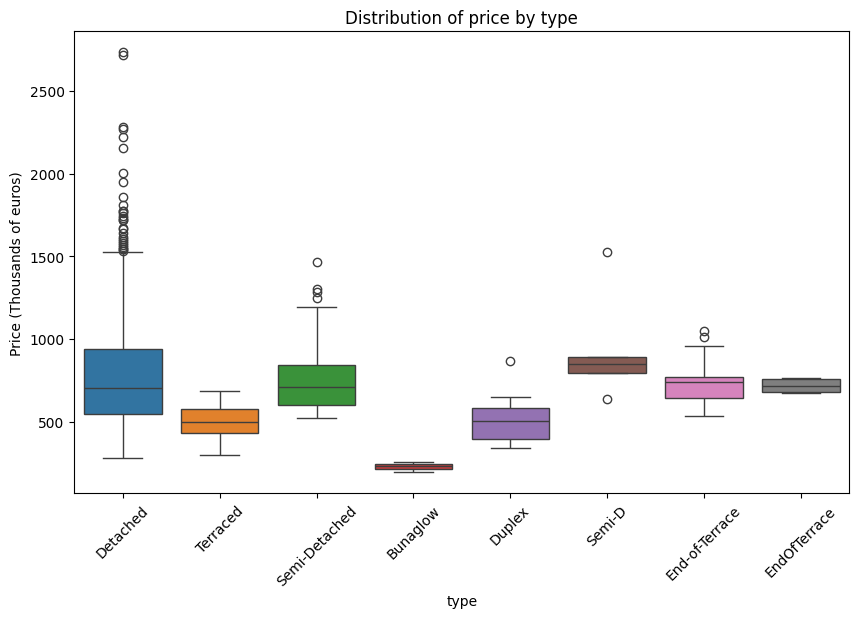

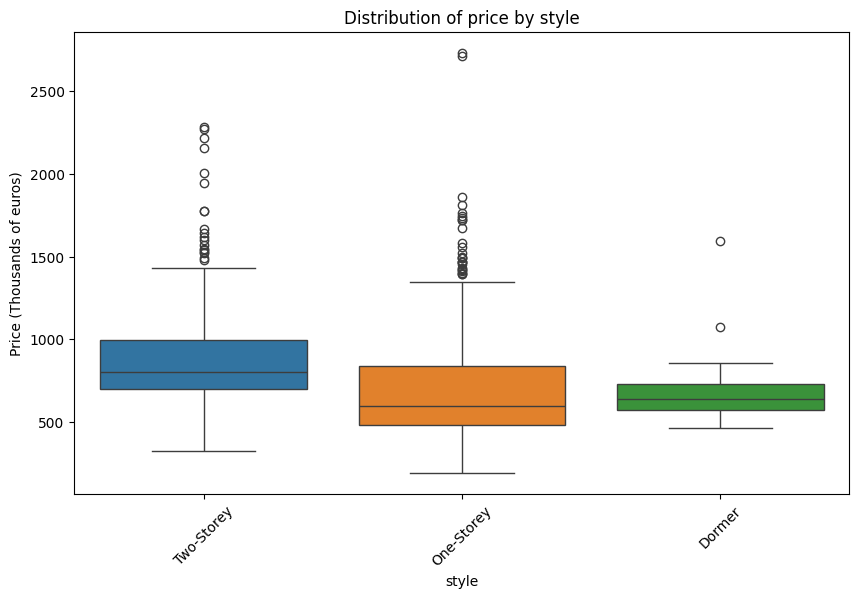

In [ ]:
# Define a function to create boxplots for categorical features
def plot_categorical_relationships(data, cat_feature, num_feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_feature, y=num_feature, data=data, hue=cat_feature)
    plt.title(f"Distribution of {num_feature} by {cat_feature}")
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.ylabel("Price (Thousands of euros)")
    plt.show()


# Plot `price` by `month_of_sale`
plot_categorical_relationships(df_eda, "month_of_sale", "price")

# Plot `price` by `location`
plot_categorical_relationships(df_eda, "location", "price")

# Plot `price` by `type`
plot_categorical_relationships(df_eda, "type", "price")

# Plot `price` by `type`
plot_categorical_relationships(df_eda, "style", "price")

The boxplots provide a visual summary of the distribution of sale prices across different categories:

**Month of Sale:** We can observe some variation in the median sale prices across different months, although the differences don't seem very pronounced. This suggests that the month of sale might not be a strong predictor of sale price.

**Location:** There is a clear distinction in the sale prices across different locations, with some locations showing higher median prices and a wider range of prices. Location appears to be a significant factor in determining house sale prices, which is consistent with the common real estate maxim "location, location, location".

**Type:** The type of the house also shows varying median sale prices. This indicates that the type of property is an important factor in the sale price.

**Style:** One-Storey houses have the widest range of prices, while Dormer houses tend to have the least variation. The style could be an important factor in combination with other predictors.


In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   day_of_sale    961 non-null    Int64 
 1   month_of_sale  961 non-null    object
 2   year_of_sale   961 non-null    Int64 
 3   location       961 non-null    object
 4   price          961 non-null    Int64 
 5   year_built     961 non-null    Int64 
 6   size           961 non-null    Int64 
 7   type           961 non-null    object
 8   style          961 non-null    Int64 
 9   bedrooms       961 non-null    Int64 
 10  bathrooms      961 non-null    Int64 
dtypes: Int64(8), object(3)
memory usage: 97.6+ KB


## Simple Linear Regression

---


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Dictionary to hold the R² values for each feature
r2_values = {}

# Perform regression for each numeric feature and calculate R²
for feature in [
    "day_of_sale",
    "year_of_sale",
    "year_built",
    "size",
    "bedrooms",
    "bathrooms",
]:
    X = df_cleaned[[feature]]  # Feature matrix
    y = df_cleaned["price"]  # Target vector
    model.fit(X, y)
    predictions = model.predict(X)
    r2_values[feature] = r2_score(y, predictions)

r2_values

{'day_of_sale': 0.0009798710005121114,
 'year_of_sale': 0.0013878249714237567,
 'year_built': 0.2714050821501365,
 'size': 0.4760383737556756,
 'bedrooms': 0.05123124331628792,
 'bathrooms': 0.32236408495970614}

We can observe from above results, that day of sale and year of sale, have negligible significane in explaining the variability of the `price`. Hence we drop these variables and develop a linear model to use only the following variables:

- `size`
- `year_built`
- `bedrooms`
- `bathrooms`


In [ ]:
from sklearn.model_selection import train_test_split

# Choose the feature and target variable
X = df_cleaned[
    ["size", "year_built", "bedrooms", "bathrooms"]
]  # Example using 'size' as it was the best predictor
# print(X.head())

y = df_cleaned["price"]
print(y.head())

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)  # 20% for testing

# Now X_train and y_train can be used to train the model, while X_test and y_test can be used to evaluate it.from sklearn.model_selection import train_test_split

# Choose the feature and target variable
X = df_cleaned[
    ["size", "year_built", "bedrooms", "bathrooms"]
]  # Example using 'size' as it was the best predictor
# print(X.head())

y = df_cleaned["price"]
print(y.head())

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)  # 20% for testing

# Now X_train and y_train can be used to train the model, while X_test and y_test can be used to evaluate it.

0     732986
1     985889
2    1047124
3     516439
4     890423
Name: price, dtype: Int64
0     732986
1     985889
2    1047124
3     516439
4     890423
Name: price, dtype: Int64


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Predict house prices on the test data
y_pred = lm.predict(X_test)

# Calculate and print the Mean Squared Error and the R² score for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model coefficients and intercept
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Coefficients: [   567.22570963   4422.42343459 -86084.90784424 -24673.97909544]
Intercept: -8566727.315729816
Mean Squared Error: 34187066988.16115
R² Score: 0.6421763108173566


> Price = 567.2257*`Size` + 4422.4234*`Year Built` - 86084.9078*`Bedrooms` - 24673.9791*`Bathrooms` - 8566727.3157


R² = 0.642 means that approximately 64.2% of the variation in house prices can be explained by the model’s inputs (size, year built, bedrooms, bathrooms).


### Preparing data for modelling


In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   day_of_sale    961 non-null    Int64 
 1   month_of_sale  961 non-null    object
 2   year_of_sale   961 non-null    Int64 
 3   location       961 non-null    object
 4   price          961 non-null    Int64 
 5   year_built     961 non-null    Int64 
 6   size           961 non-null    Int64 
 7   type           961 non-null    object
 8   style          961 non-null    Int64 
 9   bedrooms       961 non-null    Int64 
 10  bathrooms      961 non-null    Int64 
dtypes: Int64(8), object(3)
memory usage: 97.6+ KB


In [ ]:
# Preparing data for modelling
from sklearn.preprocessing import LabelEncoder


# dataframe for modelling purposes
df_model = df_cleaned.copy(deep=True)

# categorical varaibles
categorical_variables = ["month_of_sale", "location", "type", "style"]

# encoding categorical variables
for cat_var in categorical_variables:
    df_model[cat_var] = LabelEncoder().fit_transform(df_cleaned[cat_var])

# verifying data
df_model.info()

df_model.head()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   day_of_sale    961 non-null    Int64
 1   month_of_sale  961 non-null    int32
 2   year_of_sale   961 non-null    Int64
 3   location       961 non-null    int32
 4   price          961 non-null    Int64
 5   year_built     961 non-null    Int64
 6   size           961 non-null    Int64
 7   type           961 non-null    int32
 8   style          961 non-null    int64
 9   bedrooms       961 non-null    Int64
 10  bathrooms      961 non-null    Int64
dtypes: Int64(7), int32(3), int64(1)
memory usage: 85.4 KB


,day_of_sale,month_of_sale,year_of_sale,location,price,year_built,size,type,style,bedrooms,bathrooms
0,6,4,2020,6,732986,2010,1696,1,2,3,2
1,6,4,2020,6,985889,2004,2355,1,2,4,2
2,7,4,2020,0,1047124,2013,1836,1,2,3,2
3,7,4,2020,0,516439,2000,1000,1,1,3,1
4,16,4,2020,0,890423,2011,1536,1,1,3,2


In [ ]:
df_model.to_csv("./hist_housing_sale_data_encoded.csv", index=False)

The dataset has no missing values, and all features are numerical. Here's the summary of our next steps:

1. **Feature Selection**: We'll use 'price', 'year_built', 'size', 'type', 'style', 'bedrooms', and 'bathrooms' as predictors. The features related to the date of sale ('day_of_sale', 'month_of_sale', 'year_of_sale') could be less indicative of the location, unless there's a temporal pattern specific to locations, but we'll initially exclude them to simplify the model.

2. **Model Selection**: We'll start with a Random Forest Classifier, which is robust, handles a mix of features well, and provides good performance without the need for extensive hyperparameter tuning.

3. **Model Evaluation**: We'll use k-fold cross-validation to evaluate the classifier’s performance. This method will help us understand how well our model is likely to perform on unseen data.


## Classification using Random Forest Classifier

---


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selecting features and target variable
X = df_model[["price", "year_built", "size", "type", "style", "bedrooms", "bathrooms"]]
y = df_model["location"]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(cv_scores)

print(classification_rep)

print(confusion_mat)

[0.7357513  0.73958333 0.75520833 0.75520833 0.71875   ]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        37
           1       0.76      0.84      0.80        56
           2       0.73      0.73      0.73        15
           3       0.50      0.45      0.48        33
           4       0.71      0.58      0.64        26
           5       0.67      0.59      0.63        37
           6       0.82      0.73      0.77        37

    accuracy                           0.69       241
   macro avg       0.69      0.67      0.68       241
weighted avg       0.69      0.69      0.69       241

[[29  1  0  1  3  0  3]
 [ 1 47  0  7  0  1  0]
 [ 3  0 11  0  1  0  0]
 [ 1  5  0 15  1 10  1]
 [ 7  0  2  0 15  0  2]
 [ 1  7  0  7  0 22  0]
 [ 5  2  2  0  1  0 27]]


The Random Forest classifier has been evaluated using 5-fold cross-validation and test set evaluation.

#### Cross-Validation Scores

The average accuracy across the 5 folds of cross-validation is approximately \(73.9\%\). The scores for each fold range from \(71.9\%\) to \(75.5\%\), indicating a reasonably consistent performance across different subsets of the data.

#### Test Set Evaluation

The model achieved an overall accuracy of \(71\%\) on the test set. Here's the breakdown of precision, recall, and F1-score by location class:

- Precision, recall, and F1-scores show variability across different location classes, suggesting the model performs differently depending on the location.
- Locations coded as 0 and 5 show strong recall but varying precision. Location 6 has both high precision and recall.
- The overall F1-scores indicate good balance between precision and recall for most classes.

#### Confusion Matrix

The confusion matrix provides insight into which locations are frequently confused with others:

- Location 0 is mostly correctly predicted but has some confusion with locations 4 and 6.
- Location 1 shows confusion with locations 3 and 6.
- Location 5 tends to be confused with location 3.


## Experimenting with different subset of predictors

---


In [ ]:
from sklearn.metrics import accuracy_score

# Define the feature sets by excluding one feature at a time
feature_sets = {
    "all_features": [
        "price",
        "year_built",
        "size",
        "type",
        "style",
        "bedrooms",
        "bathrooms",
    ],
    "exclude_bathrooms": ["price", "year_built", "size", "type", "style", "bedrooms"],
    "exclude_bedrooms": ["price", "year_built", "size", "type", "style", "bathrooms"],
    "exclude_bathrooms_bedrooms": ["price", "year_built", "size", "type", "style"],
    "exclude_type_bathrooms_bedrooms": ["price", "year_built", "size", "style"],
    "exclude_style_bathrooms_bedrooms": ["price", "year_built", "size", "type"],
    "exclude_style_type_bathrooms_bedrooms": ["price", "year_built", "size"],
}

# Dictionary to store the accuracy scores for each feature set
accuracy_scores = {}

# Dictionary to store the classification reports for each feature set
classification_reports = {}

# Iterate over each feature set and evaluate the model
for set_name, features in feature_sets.items():
    # Splitting the dataset based on the feature subset
    X_subset = df_model[features]
    X_train_subset, X_test_subset, y_train, y_test = train_test_split(
        X_subset, y, test_size=0.2, random_state=42
    )

    # Creating and fitting the Random Forest classifier
    rf_classifier_subset = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier_subset.fit(X_train_subset, y_train)

    # Predicting the test set results and evaluating
    y_pred_subset = rf_classifier_subset.predict(X_test_subset)
    accuracy_scores[set_name] = accuracy_score(y_test, y_pred_subset)
    classification_reports[set_name] = classification_report(
        y_test, y_pred_subset, output_dict=True
    )

# Extract precision, recall, and f1-score for each feature set
summary_metrics = {
    set_name: {
        "Accuracy": accuracy_scores[set_name],
        "Precision": classification_reports[set_name]["weighted avg"]["precision"],
        "Recall": classification_reports[set_name]["weighted avg"]["recall"],
        "F1-score": classification_reports[set_name]["weighted avg"]["f1-score"],
    }
    for set_name in feature_sets.keys()
}

summary_metrics


print("Feature Set Performance Metrics:\n")
for set_name, metrics in summary_metrics.items():
    print(f"{set_name.replace('_', ' ').title()}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("------------------------------------------------------------")

Feature Set Performance Metrics:

All Features:
  Accuracy: 0.7098
  Precision: 0.7224
  Recall: 0.7098
  F1-score: 0.7106
------------------------------------------------------------
Exclude Bathrooms:
  Accuracy: 0.7098
  Precision: 0.7205
  Recall: 0.7098
  F1-score: 0.7094
------------------------------------------------------------
Exclude Bedrooms:
  Accuracy: 0.6788
  Precision: 0.6872
  Recall: 0.6788
  F1-score: 0.6752
------------------------------------------------------------
Exclude Bathrooms Bedrooms:
  Accuracy: 0.6943
  Precision: 0.7058
  Recall: 0.6943
  F1-score: 0.6925
------------------------------------------------------------
Exclude Type Bathrooms Bedrooms:
  Accuracy: 0.6839
  Precision: 0.6937
  Recall: 0.6839
  F1-score: 0.6806
------------------------------------------------------------
Exclude Style Bathrooms Bedrooms:
  Accuracy: 0.6736
  Precision: 0.6789
  Recall: 0.6736
  F1-score: 0.6696
------------------------------------------------------------
Excl

### Key Observations

- **All Features**: Utilizing all features provided the best overall performance, achieving the highest precision, recall, and F1-score. This suggests that each feature contributes information beneficial to the classification model.
- **Exclude Bedrooms and Bathrooms**: Excluding bathrooms alone did not significantly change the performance metrics, indicating that other features can compensate for the absence of this information. However, excluding both bedrooms and bathrooms leads to a noticeable decline in all metrics, suggesting a combined importance of these features in predicting location.
- **Gradual Decrease in Metrics**: As more types of features are excluded, particularly when excluding type, style, bathrooms, and bedrooms together, there is a progressive decrease in accuracy, precision, recall, and F1-score. This indicates that these features collectively hold substantial information necessary for effective classification.
- **Minimal Impact of Excluding Single Feature Types**: Excluding a single type of feature (like bathrooms or bedrooms alone) does not cause drastic reductions in model performance, implying robustness in the dataset's feature set. However, the compounded exclusion of multiple feature types highlights their collective importance.

### Conclusion

- The full feature set yields the highest performance, underscoring the synergy between different property attributes in determining the location of a house.
- Features such as type, style, bedrooms, and bathrooms appear increasingly critical when removed in combination, suggesting that they encode distinct aspects of the locational information that are not entirely captured by the remaining features.
- Future analyses should consider the role of each feature in the context of how they interact with others to enhance model robustness and interpretability. Addressing potential overfitting or feature redundancy might also refine the model's predictive power and efficiency.
